In [3]:
# 임포트
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import pandas as pd


In [2]:
# 테스트
img = cv2.imread("image/test1.jpg", cv2.IMREAD_GRAYSCALE)

np.set_printoptions(threshold=1000)
print(img)


None


In [10]:
# 상의 파일 불러오기

input_dir = "./target/top/"
#output_dir = "./image/output/"

#imgarr = np.array([])
imgarr = []

if not os.path.exists(input_dir) :
    os.mkdir(input_dir)

#if not os.path.exists(output_dir) :
#    os.mkdir(output_dir)    

# 이미지 불러오기
file_list = os.listdir(input_dir)

for file in file_list :
    
    img = cv2.imread(input_dir + file,  cv2.IMREAD_GRAYSCALE)
    
    #imgarr.append(img)
    imgarr.append(np.hstack(img))
    #imgarr = np.append(imgarr, img, axis = 0)
    


In [11]:
# 하의 파일 불러오기

input_dir = "./target/bottom/"
#output_dir = "./image/output/"

#imgarr = np.array([])
imgarr2 = []

if not os.path.exists(input_dir) :
    os.mkdir(input_dir)

#if not os.path.exists(output_dir) :
#    os.mkdir(output_dir)    

# 이미지 불러오기
file_list = os.listdir(input_dir)

for file in file_list :
    
    img = cv2.imread(input_dir + file,  cv2.IMREAD_GRAYSCALE)
    
    #imgarr2.append(img)
    imgarr2.append(np.hstack(img))
    #imgarr = np.append(imgarr, img, axis = 0)
    


In [80]:
imgarr.shape

(10000, 256, 256)

In [79]:
imgarr = np.array(imgarr)
imgarr2 = np.array(imgarr2)

In [81]:
data=np.vstack((imgarr,imgarr2))

In [82]:
data.shape

(20000, 256, 256)

In [15]:
# X data 완성
img_df = pd.DataFrame(data)
img_df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
res = []


for i in range(0,200):
    for j in range(0,100):
        
        res.append(i+1)

In [13]:
# y data 완성
res_df = pd.DataFrame(res)
res_df

,0
0,1
1,1
2,1
3,1
4,1
...,...
19995,200
19996,200
19997,200
19998,200


In [18]:
res_df = pd.get_dummies(res_df[0])

# 여기부터 학습 시작

In [20]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # 분류 모델
# 정확도 측정 도구
from sklearn.metrics import accuracy_score


from lightgbm import LGBMClassifier

from lightgbm import early_stopping
from lightgbm import log_evaluation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(img_df, res_df, test_size=0.2)

In [ ]:
lgb_img = LGBMClassifier(n_estimators=400)

In [23]:
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

In [48]:
lgb_img.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[early_stopping(100), log_evaluation(1)])

ValueError: y should be a 1d array, got an array of shape (16000, 200) instead.

In [13]:
pre = lgb_img.predict(X_test)
accuracy_score(pre, y_test)

NameError: name 'lgb_img' is not defined

In [14]:
import joblib

In [33]:
joblib.dump(lgb_img, './model.pkl')

['./model.pkl']

# KNN 다중분류 모델

In [83]:
# 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=1)

In [84]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
pre = knn_model.predict(X_test)

In [86]:
accuracy_score(pre,y_test)

0.88725

In [59]:
train_acc = []
test_acc = []

# n_neighbors를 1~30까지 돌림
for i in range(1,30):
    # n_neighbors를 변경해가면서 모델 생성
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # 생성된 모델에 학습
    knn.fit(X_train, y_train)

    # 만들어진 규칙으로 score 값 저장
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test,y_test))
    
    # train_pre = knn.predict(X_train)
    # train_score = accuracy_score(train_pre,y_train)
    # train_acc.append(train_score)
    print(f"{i}번째 score : {knn.score(X_test, y_test)}")
    ㅣㅣ

1번째 score : 0.885
2번째 score : 0.79425
3번째 score : 0.8545
4번째 score : 0.75325
5번째 score : 0.79875
6번째 score : 0.69475
7번째 score : 0.733
8번째 score : 0.63175
9번째 score : 0.6645
10번째 score : 0.57075
11번째 score : 0.598
12번째 score : 0.50675
13번째 score : 0.53125
14번째 score : 0.451
15번째 score : 0.46975
16번째 score : 0.398
17번째 score : 0.41825
18번째 score : 0.35725
19번째 score : 0.37525
20번째 score : 0.3145
21번째 score : 0.3305
22번째 score : 0.279
23번째 score : 0.28875
24번째 score : 0.2475
25번째 score : 0.2565
26번째 score : 0.22075
27번째 score : 0.22875
28번째 score : 0.19825
29번째 score : 0.20375


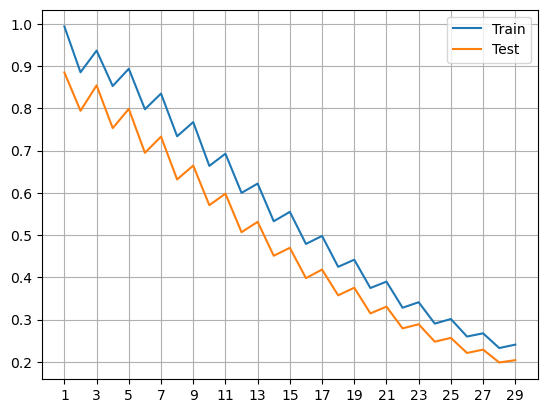

In [62]:
plt.plot(range(1,30), train_acc, label='Train') # 트레인 정확도
plt.plot(range(1,30), test_acc, label="Test") # 테스트 정확도
plt.grid() # 격자표시
plt.xticks(range(1,30,2)) # x축 간격 조절
plt.legend()
plt.show()

In [ ]:
scores = cross_val_score(iris_knn_model, X_train, y_train, cv=5)

# 90퍼 못넘음... 여기서부터 딥러닝

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from keras.layers import Input

In [120]:
model1 = Sequential()


# 입력 레이어 생성
input_shape = (65536,)  # 주어진 데이터의 형상에 맞게 설정
input_layer = Input(shape=input_shape)

# 모델설계
model1.add(Dense(units = 512, activation ='relu', input_shape=input_shape))
model1.add(Dense(units = 512, activation = 'relu'))
model1.add(Dense(units = 384, activation = 'relu'))
model1.add(Dense(units = 384, activation = 'relu'))
model1.add(Dense(units = 256, activation = 'relu'))

# 출력층
model1.add(Dense(units = 200,activation = 'softmax'))

model1.summary()

# 학습방법 설정

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               33554944  
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dense_50 (Dense)            (None, 384)               196992    
                                                                 
 dense_51 (Dense)            (None, 384)               147840    
                                                                 
 dense_52 (Dense)            (None, 256)               98560     
                                                                 
 dense_53 (Dense)            (None, 200)               51400     
                                                                 
Total params: 34,312,392
Trainable params: 34,312,392


In [27]:
model2 = Sequential()


# 입력 레이어 생성
input_shape = (65536,)  # 주어진 데이터의 형상에 맞게 설정
input_layer = Input(shape=input_shape)

# 모델설계
model2.add(Dense(units = 200, activation ='relu', input_shape=input_shape))
model2.add(Dense(units = 384, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 512, activation = 'relu'))
model2.add(Dense(units = 384, activation = 'relu'))
model2.add(Dense(units = 384, activation = 'relu'))
model2.add(Dense(units = 256, activation = 'relu'))

# 출력층
model2.add(Dense(units = 200,activation = 'softmax'))

model2.summary()

# 학습방법 설정

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               13107400  
                                                                 
 dense_1 (Dense)             (None, 384)               77184     
                                                                 
 dense_2 (Dense)             (None, 512)               197120    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 384)               196992    
                                                                 
 dense_5 (Dense)             (None, 384)               147840    
                                                                 
 dense_6 (Dense)             (None, 256)               9

In [30]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
2899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
X_train.shape

(16000, 65536)

In [109]:
y_train.shape

(16000, 200)

In [122]:
model1.fit(X_train,y_train, epochs = 32, validation_data = (X_test, y_test))

Epoch 1/32
500/500 [==============================] - 76s 151ms/step - loss: 2.0820 - accuracy: 0.4548 - val_loss: 0.6797 - val_accuracy: 0.7368
Epoch 2/32
500/500 [==============================] - 75s 150ms/step - loss: 0.5130 - accuracy: 0.8049 - val_loss: 0.4850 - val_accuracy: 0.8098
Epoch 3/32
500/500 [==============================] - 74s 148ms/step - loss: 0.3419 - accuracy: 0.8534 - val_loss: 0.4024 - val_accuracy: 0.8267
Epoch 4/32
500/500 [==============================] - 74s 148ms/step - loss: 0.3153 - accuracy: 0.8589 - val_loss: 0.3207 - val_accuracy: 0.8572
Epoch 5/32
500/500 [==============================] - 74s 148ms/step - loss: 0.2632 - accuracy: 0.8770 - val_loss: 0.4528 - val_accuracy: 0.8273
Epoch 6/32
500/500 [==============================] - 74s 148ms/step - loss: 0.2708 - accuracy: 0.8726 - val_loss: 0.4161 - val_accuracy: 0.8462
Epoch 7/32
500/500 [==============================] - 75s 149ms/step - loss: 0.2231 - accuracy: 0.8881 - val_loss: 0.1966 - val_ac

In [40]:
model2.fit(X_train,y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
500/500 [==============================] - 31s 62ms/step - loss: 0.1167 - accuracy: 0.9545 - val_loss: 0.2505 - val_accuracy: 0.9160
Epoch 2/5
500/500 [==============================] - 31s 62ms/step - loss: 0.1444 - accuracy: 0.9454 - val_loss: 0.2511 - val_accuracy: 0.9128
Epoch 3/5
500/500 [==============================] - 32s 63ms/step - loss: 0.1375 - accuracy: 0.9527 - val_loss: 0.2632 - val_accuracy: 0.9112
Epoch 4/5
500/500 [==============================] - 31s 63ms/step - loss: 0.1324 - accuracy: 0.9556 - val_loss: 0.3038 - val_accuracy: 0.9170
Epoch 5/5
500/500 [==============================] - 31s 62ms/step - loss: 0.1277 - accuracy: 0.9518 - val_loss: 0.2782 - val_accuracy: 0.9060


In [41]:
from keras.models import load_model # 모델저장

model2.save('deep_model1.h5')

In [36]:
from keras.models import load_model # 모델불러오기

model2 = load_model('deep_model.h5')

In [42]:
pre = model2.predict(X_test)

125/125 [==============================] - 1s 7ms/step


In [75]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

125/125 [==============================] - 1s 7ms/step - loss: 0.2782 - accuracy: 0.9060
정답률 =  0.906000018119812 loss= 0.2782408595085144


In [73]:
loss_and_metrics

[0.2782408595085144, 0.906000018119812]

# CNN 모델

In [7]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
# 상의 파일 불러오기

input_dir = "./target/top/"
#output_dir = "./image/output/"

#imgarr = np.array([])
imgarr = []

if not os.path.exists(input_dir) :
    os.mkdir(input_dir)

#if not os.path.exists(output_dir) :
#    os.mkdir(output_dir)    

# 이미지 불러오기
file_list = os.listdir(input_dir)

for file in file_list :
    
    img = cv2.imread(input_dir + file,  cv2.IMREAD_GRAYSCALE)
    
    imgarr.append(img)
    #imgarr.append(np.hstack(img))
    #imgarr = np.append(imgarr, img, axis = 0)
    


In [5]:
# 하의 파일 불러오기

input_dir = "./target/bottom/"
#output_dir = "./image/output/"

#imgarr = np.array([])
imgarr2 = []

if not os.path.exists(input_dir) :
    os.mkdir(input_dir)

#if not os.path.exists(output_dir) :
#    os.mkdir(output_dir)    

# 이미지 불러오기
file_list = os.listdir(input_dir)

for file in file_list :
    
    img = cv2.imread(input_dir + file,  cv2.IMREAD_GRAYSCALE)
    
    imgarr2.append(img)
    #imgarr2.append(np.hstack(img))
    #imgarr = np.append(imgarr, img, axis = 0)
    


In [9]:
imgarr = np.array(imgarr)
imgarr2 = np.array(imgarr2)

In [10]:
data=np.vstack((imgarr,imgarr2))

In [22]:
res_df = pd.get_dummies(res_df[0])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, res_df, test_size=0.2)

In [15]:
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

In [16]:
tf.config.list_physical_devices('GPU')

[]

In [17]:
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

In [91]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [24]:
y_test

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
19134,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19117,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(256,256,1), activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense (Dense)               (None, 256)               260112640 
                                                        

In [27]:
CNNMODEL_DIR = './CNNmodel/'
if not os.path.exists(CNNMODEL_DIR):
    os.mkdir(CNNMODEL_DIR)
    
modelpath='./CNNmodel/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
tf.keras.backend.clear_session()

history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=30, verbose=0, batch_size=200, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 5.17940, saving model to ./CNNmodel\01-5.1794.hdf5

Epoch 2: val_loss improved from 5.17940 to 5.03061, saving model to ./CNNmodel\02-5.0306.hdf5


In [ ]:
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [105]:
import numpy as np

import pandas as pd

import keras

import tensorflow as tf

from IPython.display import display

import PIL

In [1]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3084462868548767042
xla_global_id: -1
]


In [109]:
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'